**RMSProp**

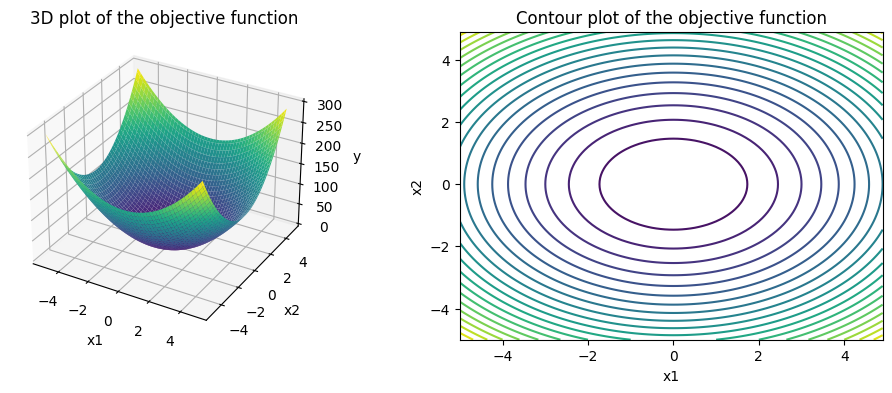

The optimal value of x1 is: -0.10352260359924752
The optimal value of x2 is: 0.0025296212056016548
The optimal value of y is: 0.05362944016394148


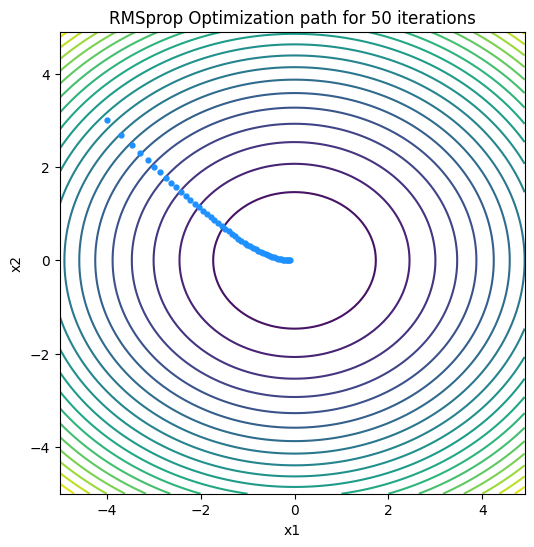

In [6]:
import numpy as  np
import matplotlib.pyplot as plt
from numpy import arange, meshgrid

# Defining the objective function
def objective(x1, x2):
    # Replace with your objective function
    return 5 * x1**2.0 + 7 * x2**2.0

# Defining the derivative of the objective function w.r.t x1
def derivative_x1(x1, x2):
    # Replace with the derivative of your objective function w.r.t x1
    return 10.0 * x1

# Defining the derivative of the objective function w.r.t x2
def derivative_x2(x1, x2):
    # Replace with the derivative of your objective function w.r.t x2
    return 14.0 * x2

  # Plotting the objective function in 3D and 2D

# Defining the range of x1 and x2
x1 = arange(-5.0, 5.0, 0.1)
x2 = arange(-5.0, 5.0, 0.1)

# Creating a meshgrid of x1 and x2
x1, x2 = meshgrid(x1, x2)

# Calculating the objective function for each combination of x1 and x2
y = objective(x1, x2)

# Plotting the objective function in 3D and 2D
fig = plt.figure(figsize=(12, 4))

# Plot 1 - 3D plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(x1, x2, y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('3D plot of the objective function')

# Plot 2 - Contour plot (2D plot)
ax = fig.add_subplot(1, 2, 2)
ax.contour(x1, x2, y, cmap='viridis', levels=20)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Contour plot of the objective function')

# Displaying the plots
plt.show()

# Defining the RMSprop optimizer
def rmsprop(x1, x2, derivative_x1, derivative_x2, learning_rate, beta, epsilon, max_epochs):
    # Creating empty lists to store the trajectories of x1, x2, and y
    x1_trajectory = []
    x2_trajectory = []
    y_trajectory = []

    # Setting the initial values of x1, x2, and y
    x1_trajectory.append(x1)
    x2_trajectory.append(x2)
    y_trajectory.append(objective(x1, x2))

    # Defining the initial values of e1 and e2
    e1 = 0
    e2 = 0

    # Running the gradient descent loop
    for _ in range(max_epochs):
        # Calculating the derivatives of the objective function w.r.t x1 and x2
        gt_x1 = derivative_x1(x1, x2)
        gt_x2 = derivative_x2(x1, x2)

        # Calculating the exponentially weighted averages of the derivatives
        e1 = beta * e1 + (1 - beta) * gt_x1**2.0
        e2 = beta * e2 + (1 - beta) * gt_x2**2.0

        # Updating the values of x1 and x2
        x1 = x1 - learning_rate * gt_x1 / (np.sqrt(e1 + epsilon))
        x2 = x2 - learning_rate * gt_x2 / (np.sqrt(e2 + epsilon))

        # Appending the values of x1, x2, and y to their respective lists
        x1_trajectory.append(x1)
        x2_trajectory.append(x2)
        y_trajectory.append(objective(x1, x2))

    return x1_trajectory, x2_trajectory, y_trajectory

# Defining the initial values of x1, x2, and other hyperparameters
x1_initial = -4.0
x2_initial = 3.0
learning_rate = 0.1
beta = 0.9
epsilon = 1e-8
max_epochs = 50

# Running the RMSprop algorithm
x1_trajectory, x2_trajectory, y_trajectory = rmsprop(
                                                x1_initial,
                                                x2_initial,
                                                derivative_x1,
                                                derivative_x2,
                                                learning_rate,
                                                beta,
                                                epsilon,
                                                max_epochs
                                            )

# Printing the optimal values of x1, x2, and y
print('The optimal value of x1 is:', x1_trajectory[-1])
print('The optimal value of x2 is:', x2_trajectory[-1])
print('The optimal value of y is:', y_trajectory[-1])

# Displying the path of y in each iteration on the contour plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)

# Plotting the contour plot
ax.contour(x1, x2, y, cmap='viridis', levels=20)

# Plotting the trajectory of y in each iteration
ax.plot(x1_trajectory, x2_trajectory, '.',
        markersize=7,  color='dodgerblue')

# Setting the labels and title of the plot
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('RMSprop Optimization path for ' + str(max_epochs) + ' iterations')

# Displaying the plot
plt.show()